#### Importing the necessary libraries

In [2]:
# %pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing the dataset

In [3]:
df = pd.read_csv('customerchurn.csv', sep = ',') 
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preparation and cleaning
##### Understanding the Dataset

In [4]:
# dataset size
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# data types
print(df.dtypes)

# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# check missing values
print(df.isnull().sum())


# summary estatistics
print(df.describe())


Number of rows: 7043
Number of columns: 21
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract  

##### Data transformation

In [5]:
#handling missing values
df = df.dropna()
df.isnull().sum()

#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

#removing useless columns
df = df.drop(columns=['customerID'])
# we can remove the ones we dont use at the end

Number of duplicate rows: 0


In [6]:

#checking outliers
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - number of outliers: {outliers.shape[0]}")


tenure - number of outliers: 0
MonthlyCharges - number of outliers: 0
TotalCharges - number of outliers: 0


##### Customer Tenure Logistic Regression

C:\Users\maria\AppData\Local\Temp\ipykernel_34172\291180389.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['Churn'] = df_model['Churn'].replace({'Yes': 1, 'No': 0})



🔍 Top 10 selected features:
['DeviceProtection_Yes', 'tenure', 'InternetService_Fiber optic', 'StreamingMovies_Yes', 'OnlineBackup_Yes', 'PaymentMethod_Electronic check', 'Contract_Two year', 'PaymentMethod_Mailed check', 'MonthlyCharges', 'PaperlessBilling_Yes']

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

✅ Accuracy: 0.808374733853797


C:\Users\maria\AppData\Local\Temp\ipykernel_34172\291180389.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols.intersection(top_features)] = scaler.fit_transform(X[numerical_cols.intersection(top_features)])


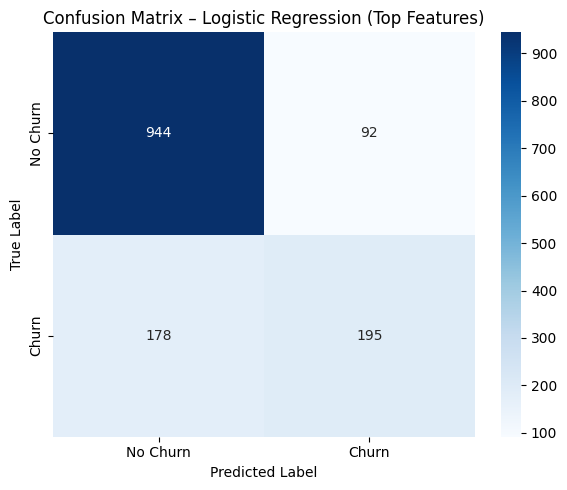

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load dataset
df = pd.read_csv('customerchurn.csv', sep=',')

# Copy for modeling
df_model = df.copy()

# Drop irrelevant columns
df_model.drop(columns=['customerID'], errors='ignore', inplace=True)

# Encode target variable
df_model['Churn'] = df_model['Churn'].replace({'Yes': 1, 'No': 0})

# Identify categorical columns
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df_model[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded and numerical features
df_model.drop(columns=categorical_cols, inplace=True)
df_model.reset_index(drop=True, inplace=True)
df_model = pd.concat([df_model, encoded_df], axis=1)

# Separate features and target
X_full = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Scale numerical features
numerical_cols = X_full.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_full[numerical_cols] = scaler.fit_transform(X_full[numerical_cols])

# Train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Train logistic regression on all features to extract importance
log_model_full = LogisticRegression(max_iter=1000)
log_model_full.fit(X_train_full, y_train)

# Get top 10 most important features
importance = pd.Series(log_model_full.coef_[0], index=X_full.columns)
top_features = importance.abs().sort_values(ascending=False).head(10).index.tolist()
print("\n🔍 Top 10 selected features:")
print(top_features)

# Use only top features for final model
X = df_model[top_features]
X[numerical_cols.intersection(top_features)] = scaler.fit_transform(X[numerical_cols.intersection(top_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train final logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluate model
y_pred = log_model.predict(X_test)
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Churn', 'Churn']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Logistic Regression (Top Features)')
plt.tight_layout()
plt.show()





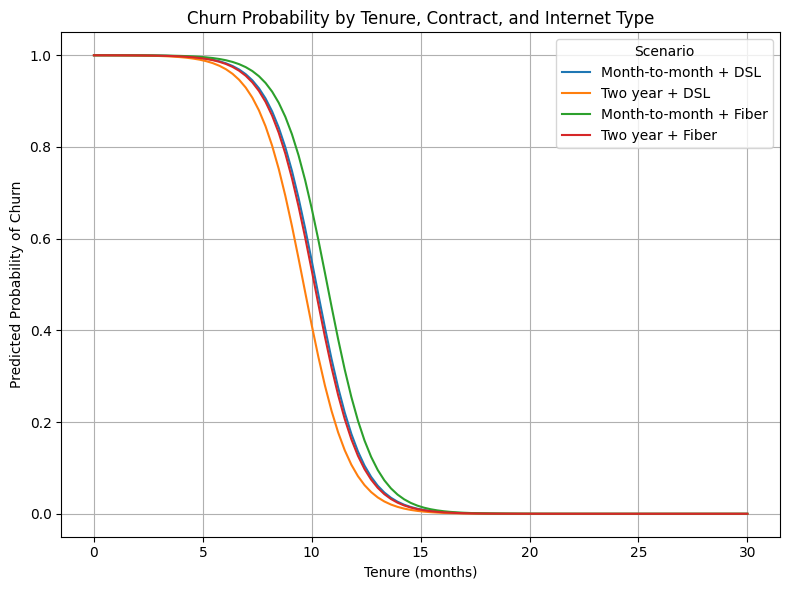

In [8]:

#Fit separate scalers for tenure and MonthlyCharges
tenure_scaler = StandardScaler()
tenure_scaler.fit(X[['tenure']])

monthly_scaler = StandardScaler()
monthly_scaler.fit(X[['MonthlyCharges']])



# Create a smooth range of tenure values
tenure_range = np.linspace(0, 30, 100)

# Define scenarios
scenarios = [
    {'Contract_Two year': 0, 'InternetService_Fiber optic': 0, 'label': 'Month-to-month + DSL'},
    {'Contract_Two year': 1, 'InternetService_Fiber optic': 0, 'label': 'Two year + DSL'},
    {'Contract_Two year': 0, 'InternetService_Fiber optic': 1, 'label': 'Month-to-month + Fiber'},
    {'Contract_Two year': 1, 'InternetService_Fiber optic': 1, 'label': 'Two year + Fiber'},
]

# Fit scalers for tenure and MonthlyCharges
tenure_scaler = StandardScaler()
tenure_scaler.fit(X_train[['tenure']])
monthly_scaler = StandardScaler()
monthly_scaler.fit(X_train[['MonthlyCharges']])

# Prepare the plot
plt.figure(figsize=(8, 6))

for scenario in scenarios:
    # Create a base DataFrame with all columns from X_train, filled with zeros
    X_plot = pd.DataFrame(0, index=range(len(tenure_range)), columns=X_train.columns)

    # Set dynamic values
    X_plot['tenure'] = tenure_range
    X_plot['Contract_Two year'] = scenario['Contract_Two year']
    X_plot['InternetService_Fiber optic'] = scenario['InternetService_Fiber optic']

    # Set fixed values (customize if needed)
    X_plot['MonthlyCharges'] = 70
    X_plot['DeviceProtection_Yes'] = 1
    X_plot['StreamingMovies_Yes'] = 1
    X_plot['OnlineBackup_Yes'] = 1
    X_plot['PaymentMethod_Electronic check'] = 1
    X_plot['PaymentMethod_Mailed check'] = 0
    X_plot['PaperlessBilling_Yes'] = 1

    # Scale tenure and MonthlyCharges
    X_plot['tenure'] = tenure_scaler.transform(X_plot[['tenure']])
    X_plot['MonthlyCharges'] = monthly_scaler.transform(X_plot[['MonthlyCharges']])

    # Predict churn probabilities
    probs = log_model.predict_proba(X_plot)[:, 1]

    # Plot the curve
    plt.plot(tenure_range, probs, label=scenario['label'])

# Final plot formatting
plt.title("Churn Probability by Tenure, Contract, and Internet Type")
plt.xlabel("Tenure (months)")
plt.ylabel("Predicted Probability of Churn")
plt.legend(title="Scenario")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Copy and clean the dataset
df_model = df.copy()

# Drop irrelevant columns
df_model.drop(columns=[
    'customerID',
    'churn_rate',
    'total_charges_to_tenure_ratio',
    'monthly_charges_diff'
], errors='ignore', inplace=True)

# Encode target variable
df_model['Churn'] = df_model['Churn'].replace({'Yes': 1, 'No': 0})

# Step 2: Identify categorical columns (excluding already encoded 'Churn')
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df_model[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded ones
df_model.drop(columns=categorical_cols, inplace=True)
df_model.reset_index(drop=True, inplace=True)
df_model = pd.concat([df_model, encoded_df], axis=1)

# Step 3: Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Step 4: Scale numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train and evaluate models
results = {}

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))
results['Logistic Regression'] = log_acc

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))
results['Decision Tree'] = tree_acc

# Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn_model.predict(X_test))
results['Nearest Neighbors'] = knn_acc

# Linear Regression (converted to classification)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_preds = np.where(lin_model.predict(X_test) >= 0.5, 1, 0)
lin_acc = accuracy_score(y_test, lin_preds)
results['Linear Regression'] = lin_acc

# Step 7: Show results
print("\n🔍 Accuracy comparison of models:\n")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.4f}")

C:\Users\maria\AppData\Local\Temp\ipykernel_34172\4231004418.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['Churn'] = df_model['Churn'].replace({'Yes': 1, 'No': 0})



🔍 Accuracy comparison of models:

Logistic Regression: 0.7800
Decision Tree: 0.7743
Nearest Neighbors: 0.7339
Linear Regression: 0.6913
